# Chapter 3 - Linear Regression

<a href="#LAB">LAB</a>

<a href="#BC">Basics</a>

1. <a href="#SLR">Simple Linrar Regression</a>

2. <a href="#MLR">Multiple Linrar Regression</a>

3. <a href="#SII">Some Important Issues</a>

4. <a href="#QEE">Qualitative Estimator and Extend to Non-linear</a>

5. <a href="#LRKNN">LR vs KNN</a>

# Lab
<a name="LAB"></a>
## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

There are 14 predictors in the data set, the data set contains median house value for 506 neighborhoods around Boston city.

In [2]:
# Data from R ISLR package - write.csv(Boston, "Boston.csv", col.names = FALSE)
boston_df = pd.read_csv("Data/Boston.csv")
boston_df.head()

crim  zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

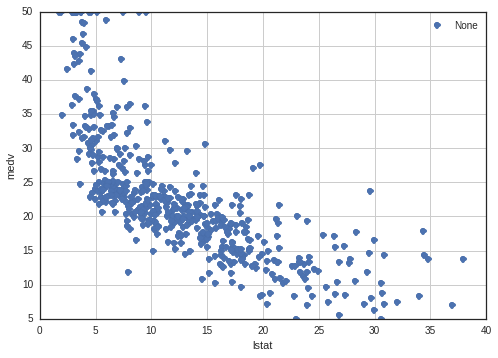

In [3]:
# LSTAT - % of population with low status; MEDV - median value of home
ax = boston_df.plot(x="lstat", y="medv", style="o", xlim=[0, 40])
ax.set_ylabel("medv")

In [4]:
# The statsmodels library provides a small subset of models, but has more emphasis on
# parameter estimation and statistical testing. The summary output is similar to R's
# summary function.
# X is an "array" of column values, y is a single column value
# X = boston_df[["lstat"]].values
X = boston_df.lstat.reshape(-1,1)
X = sm.add_constant(X)  # add the intercept term
#y = boston_df["medv"].values
y = boston_df.medv
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 16 Jun 2016   Prob (F-statistic):           5.08e-88
Time:                        11:38:10   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000        33.448    35.659
x1            -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================
"""

In [5]:
# Scikit Learn provides a larger number of models, but has more of a Machine Learning POV
# and doesn't come with the statistical testing data shown above. However, it produces an
# identical linear model as shown below:
reg = LinearRegression()
X = boston_df.lstat.reshape(-1,1)
y = boston_df.medv
reg.fit(X, y)
(reg.intercept_, reg.coef_)

(34.553840879383088, array([-0.95004935]))

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if i

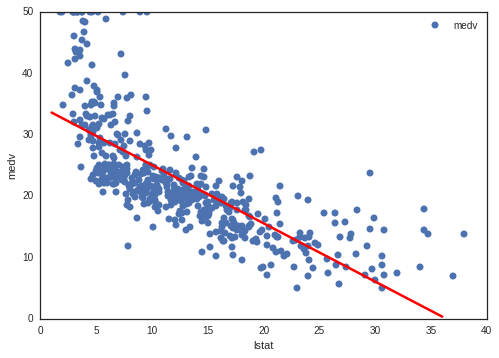

In [6]:
# Drawing the regression line on top of the scatterplot
ax = boston_df.plot(x="lstat", y="medv", style="o", xlim=[0, 40])
ax.set_ylabel("medv")
xs = range(int(np.min(X)), int(np.max(X)))
ys = [reg.predict([x]) for x in xs]
ax.plot(xs, ys, 'r', linewidth=2.5)

In [7]:
# Prediction
test_data = [[5], [10], [15]]
reg.predict(test_data)

array([ 29.80359411,  25.05334734,  20.30310057])

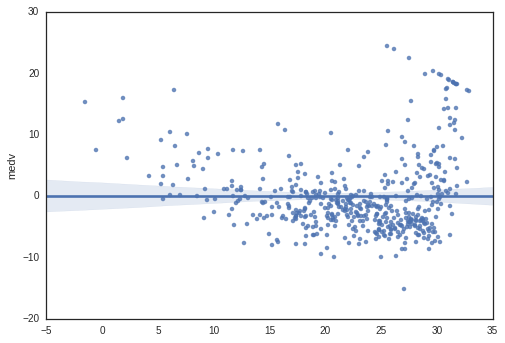

In [8]:
boston_df.pred1 = reg.predict(X)
boston_df.resid1 = boston_df.medv - boston_df.pred1
sns.regplot(boston_df.pred1, boston_df.resid1)  

## Multiple Linear Regression

In [9]:
# regression with 2 input columns
X = boston_df[["lstat", "age"]]
reg2 = LinearRegression()
reg2.fit(X, y)
(reg2.intercept_, reg2.coef_)

(33.222760531792879, array([-1.03206856,  0.03454434]))

In [10]:
# regression using all input columns
xcols = boston_df.columns[0:-1]
X = boston_df[xcols]
reg3 = LinearRegression()
reg3.fit(X, y)
(reg3.intercept_, reg3.coef_)

(36.459488385089777,
 array([ -1.08011358e-01,   4.64204584e-02,   2.05586264e-02,
          2.68673382e+00,  -1.77666112e+01,   3.80986521e+00,
          6.92224640e-04,  -1.47556685e+00,   3.06049479e-01,
         -1.23345939e-02,  -9.52747232e-01,   9.31168327e-03,
         -5.24758378e-01]))

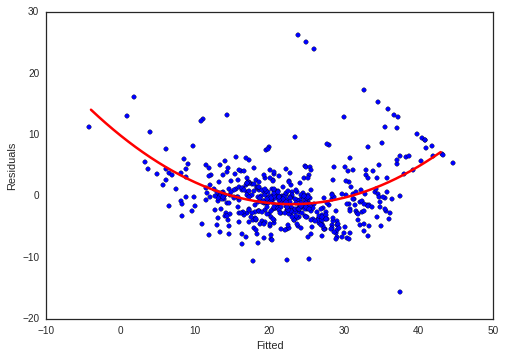

In [11]:
# Plotting a fitted regression with R returns 4 graphs - Residuals vs Fitted, Normal Q-Q,
# Scale-Location (Standardized Residuals vs Fitted), and Residuals vs Leverage. Only the 
# Q-Q plot is available from statsmodels. The residuals vs Fitted function is implemented
# below and is used for plot #1 and #3. The Residuals vs Leverage is TBD.
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel):
    plt.subplot(111)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2))    # model non-linearity with quadratic
    xs = range(int(np.min(fitted)), int(np.max(fitted)))
    plt.plot(xs, polyline(xs), color='r', linewidth=2.5)    

def qq_plot(residuals):
    sm.qqplot(residuals)

def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs - xmean) / xstd
    
fitted = reg3.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)

residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

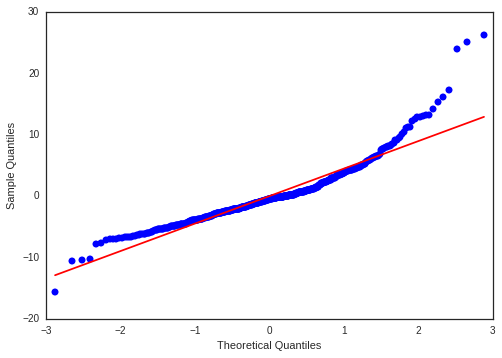

In [12]:
fig = sm.qqplot(residuals, dist="norm", line="r")

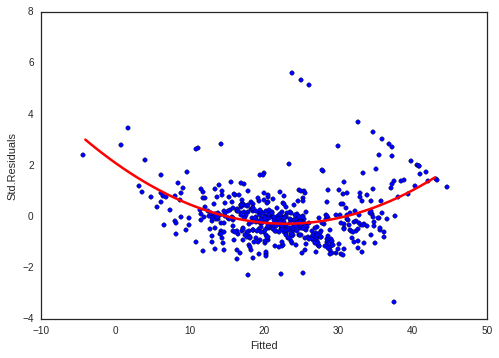

In [13]:
residuals_vs_fitted(fitted, std_residuals, "Fitted", "Std.Residuals")

## Nonlinear Terms and Interactions
Python offers formula parsing support via the Patsy toolkit. StatsModels uses Patsy to provide formula parsing support for its models. But this can be easily implemented as temporary columns in Pandas dataframes as shown below.

In [14]:
# fitting medv ~ lstat * age
boston_df["lstat*age"] = boston_df["lstat"] * boston_df["age"]
reg5 = LinearRegression()
X = boston_df[["lstat", "age", "lstat*age"]]
y = boston_df["medv"]
reg5.fit(X, y)
(reg5.intercept_, reg5.coef_)

(36.088535934612885,
 array([ -1.39211684e+00,  -7.20859509e-04,   4.15595185e-03]))

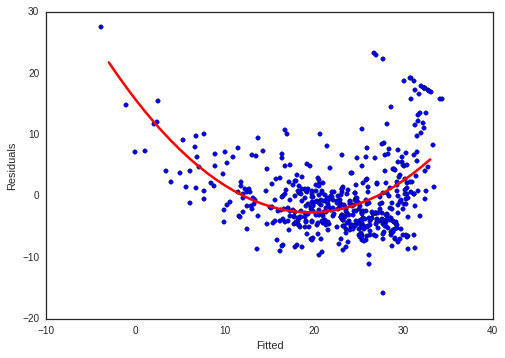

In [15]:
fitted = reg5.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

In [16]:
# fitting medv ~ lstat + I(lstat^2)
boston_df["lstat^2"] = boston_df["lstat"] ** 2
reg6 = LinearRegression()
X = boston_df[["lstat", "lstat^2"]]
y = boston_df["medv"]
reg6.fit(X, y)
# save the predicted ys for given xs for future plot
lstats = boston_df["lstat"].values
xs = range(int(np.min(lstats)), int(np.max(lstats)))
ys6 = [reg6.predict([x, x*x]) for x in xs]
(reg6.intercept_, reg6.coef_)

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if i

(42.862007328169327, array([-2.3328211 ,  0.04354689]))

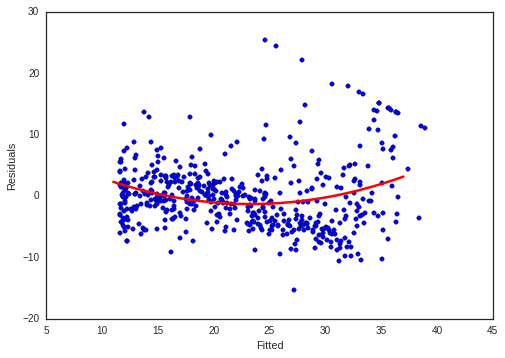

In [17]:
fitted = reg6.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

In [18]:
# fitting medv ~ poly(lstat,4). We already have lstat^2 and lstat from previous
boston_df["lstat^4"] = np.power(boston_df["lstat"], 4)
boston_df["lstat^3"] = np.power(boston_df["lstat"], 4)
X = boston_df[["lstat^4", "lstat^3", "lstat^2", "lstat"]]
y = boston_df["medv"]
reg7 = LinearRegression()
reg7.fit(X, y)
ys7 = [reg7.predict([x**4, x**3, x**2, x]) for x in xs]
(reg7.intercept_, reg7.coef_)

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if i

(46.800943987797865,
 array([ -1.17511373e-05,  -1.17511357e-05,   9.23027375e-02,
         -3.27115207e+00]))

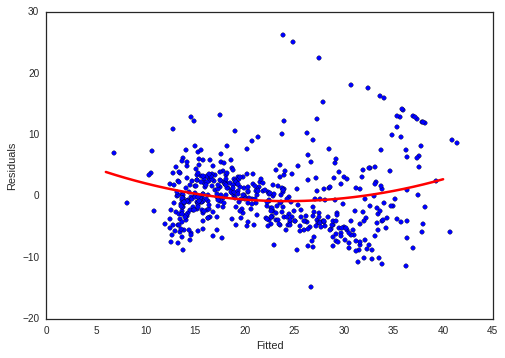

In [19]:
fitted = reg7.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

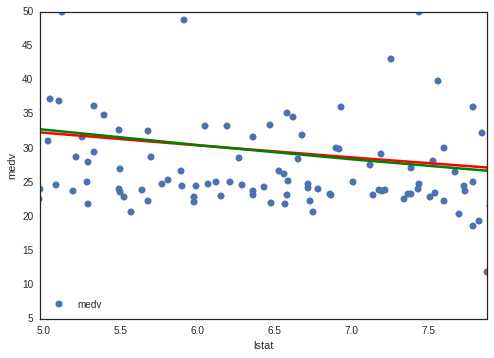

In [20]:
# Plot the different lines. Not that the green line (reg7) follows the distribution
# better than the red line (reg6).
ax = boston_df.plot(x="lstat", y="medv", style="o")
ax.set_ylabel("medv")
plt.plot(xs, ys6, color='r', linewidth=2.5)
plt.plot(xs, ys7, color='g', linewidth=2.5)

## Qualitative Predictors

In [21]:
# Data from ISLR package: write.csv(Carseats, 'Carseats.csv', col.names=FALSE)
carseats_df = pd.read_csv("Data/Carseats.csv")
carseats_df.head()

Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0           1   9.50        138      73           11         276    120   
1           2  11.22        111      48           16         260     83   
2           3  10.06        113      35           10         269     80   
3           4   7.40        117     100            4         466     97   
4           5   4.15        141      64            3         340    128   

  ShelveLoc  Age  Education Urban   US  
0       Bad   42         17   Yes  Yes  
1      Good   65         10   Yes  Yes  
2    Medium   59         12   Yes  Yes  
3    Medium   55         14   Yes  Yes  
4       Bad   38         13   Yes   No

In [22]:
# convert non-numeric to factors
carseats_df["ShelveLoc"] = pd.factorize(carseats_df["ShelveLoc"])[0]
carseats_df["Urban"] = pd.factorize(carseats_df["Urban"])[0]
carseats_df["US"] = pd.factorize(carseats_df["US"])[0]
# Sales ~ . + Income:Advertising + Age:Price
carseats_df["Income:Advertising"] = carseats_df["Income"] * carseats_df["Advertising"]
carseats_df["Age:Price"] = carseats_df["Age"] * carseats_df["Price"]
X = carseats_df[carseats_df[1:].columns]
y = carseats_df["Sales"]
reg = LinearRegression()
reg.fit(X, y)
(reg.intercept_, reg.coef_)

(-7.9047879353311146e-14,
 array([ -1.42557855e-16,   1.00000000e+00,  -1.51324607e-15,
         -8.39028486e-16,   1.16276211e-14,   1.17428201e-16,
         -8.24114353e-16,   2.72026935e-14,  -1.22157652e-15,
         -7.79995372e-16,   7.63669659e-16,   7.49790854e-15,
         -4.63446136e-18,   7.92968489e-17]))

In [23]:
# R has a contrasts() function that shows how factors are encoded by default. We can do 
# this manually using scikit-learn's OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

colnames = ["ShelveLoc", "Urban", "US"]
enc = OneHotEncoder()
X = carseats_df[colnames]
enc.fit(X)
X_tr = enc.transform(X).toarray()
colnos = enc.n_values_
colnames_tr = []
for (idx, colname) in enumerate(colnames):
    for i in range(0, colnos[idx]):
        colnames_tr.append(colname + "_" + str(i))
col = 0
for colname_tr in colnames_tr:
    carseats_df[colname_tr] = X_tr[:, col]
    col = col + 1
del carseats_df["ShelveLoc"]
del carseats_df["Urban"]
del carseats_df["US"]
carseats_df[colnames_tr].head()

ShelveLoc_0  ShelveLoc_1  ShelveLoc_2  Urban_0  Urban_1  US_0  US_1
0            1            0            0        1        0     1     0
1            0            1            0        1        0     1     0
2            0            0            1        1        0     1     0
3            0            0            1        1        0     1     0
4            1            0            0        1        0     0     1

## Writing Functions

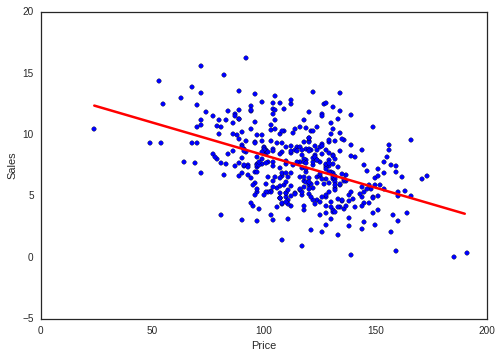

In [24]:
def regplot(x, y, xlabel, ylabel, dot_style, line_color):
    x = x.values
    y = y.values
    reg = LinearRegression()
    X = np.matrix(x).T
    reg.fit(X, y)
    ax = plt.scatter(x, y, marker=dot_style)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    xs = range(int(np.min(x)), int(np.max(x)))
    ys = [reg.predict(x) for x in xs]
    plt.plot(xs, ys, color=line_color, linewidth=2.5)

regplot(carseats_df["Price"], carseats_df["Sales"], "Price", "Sales", 'o', 'r')

# Basics
<a name="BC"></a>

## 3.1 Simple Linear Regression
<a name="SLR"></a>

In [25]:
import statsmodels

In [26]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### Load Datasets
Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html, which is introduced in chapter 2

In [27]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
5      8.7   48.9       75.0    7.2
6     57.5   32.8       23.5   11.8
7    120.2   19.6       11.6   13.2
8      8.6    2.1        1.0    4.8
9    199.8    2.6       21.2   10.6
10    66.1    5.8       24.2    8.6
11   214.7   24.0        4.0   17.4
12    23.8   35.1       65.9    9.2
13    97.5    7.6        7.2    9.7
14   204.1   32.9       46.0   19.0
15   195.4   47.7       52.9   22.4
16    67.8   36.6      114.0   12.5
17   281.4   39.6       55.8   24.4
18    69.2   20.5       18.3   11.3
19   147.3   23.9       19.1   14.6
20   218.4   27.7       53.4   18.0
21   237.4    5.1       23.5   12.5
22    13.2   15.9       49.6    5.6
23   228.3   16.9       26.2   15.5
24    62.3   12.6       18.3    9.7
25   262.9    3.5       19.5   12.0
26   142.9   29.3       12.6

In [28]:
credit = pd.read_csv('Data/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

    Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   

   Ethnicity  Balance  Student2  
0  Caucasian      333         0  
1      Asian      903         1  
2      Asian      580         0  

In [29]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### Figure 3.1 - Least squares fit

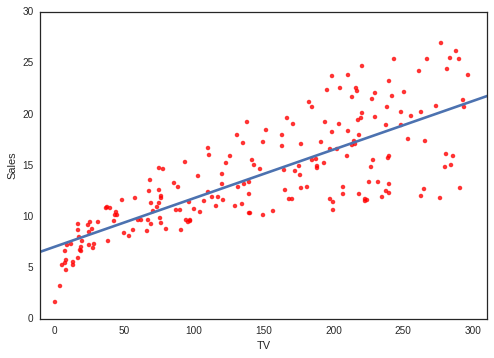

In [30]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-10,310)
plt.ylim(ymin=0);

Residual sum of squares 
<center>
<img src="http://i.imgur.com/xalx4Wx.png" width="600">
</center>

In [31]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)
print(regr.score(X,y))

14.0225
[ 0.04753664]
0.61187505085


In [32]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

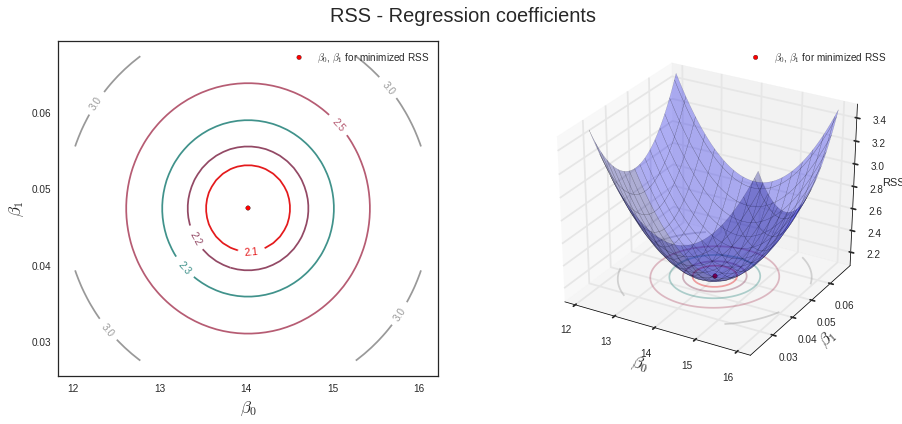

In [33]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=cm.Set1, alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

- standard error
<center>
<img src="http://i.imgur.com/8zwD6eQ.png" width="600">
</center>

It can define confidence level, t statistic, and p-value

### Confidence interval on page 67 & Table 3.1 & 3.2 (Statsmodels) (Intercept and Slope respectively?)

In [34]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [35]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.1025305831313514

- The accuracy of model dependes on Residual Standard Error or $R^2$ statistic 

### Table 3.1 & 3.2 (Scikit-learn)

In [36]:
regr = skl_lm.LinearRegression()

X = advertising.TV.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.03259354913
[ 0.04753664]


In [37]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.61187505085007099

## Multiple Linear Regression
<a name="MLR"></a>

### Table 3.3 (Statsmodels)

In [38]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [39]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Table 3.4 & 3.6 (Statsmodels)

In [40]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 22 Mar 2016   Prob (F-statistic):           1.58e-96
Time:                        06:40:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Table 3.5 - Correlation Matrix

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


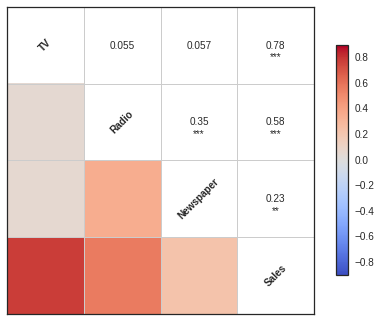

In [41]:
# Using the seaborn correlation plot.
sns.corrplot(advertising)

In [42]:
# Using Numpy
np.corrcoef(advertising, rowvar=None).round(3)

array([[ 1.   ,  0.543, -0.257, ...,  0.972,  0.998,  0.976],
       [ 0.543,  1.   ,  0.629, ...,  0.364,  0.501,  0.373],
       [-0.257,  0.629,  1.   , ..., -0.469, -0.316, -0.458],
       ..., 
       [ 0.972,  0.364, -0.469, ...,  1.   ,  0.986,  1.   ],
       [ 0.998,  0.501, -0.316, ...,  0.986,  1.   ,  0.988],
       [ 0.976,  0.373, -0.458, ...,  1.   ,  0.988,  1.   ]])

## Some Important Issues
<a name="SII"></a>

### Figure 3.5 - Multiple Linear Regression

In [43]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']].as_matrix()
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[ 0.18799423  0.04575482]
2.92109991241


In [44]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

            Radio          TV
count  200.000000  200.000000
mean    23.264000  147.042500
std     14.846809   85.854236
min      0.000000    0.700000
25%      9.975000   74.375000
50%     22.900000  149.750000
75%     36.525000  218.825000
max     49.600000  296.400000

In [45]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

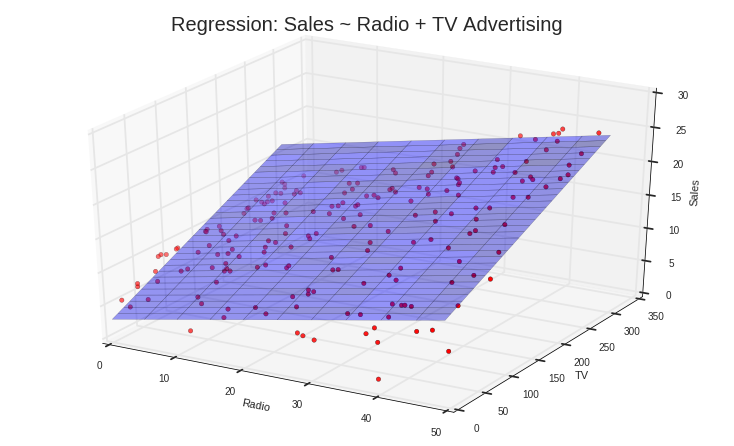

In [46]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')

## Quanlitative Predictors
<a name="QEE"></a>
### Figure 3.6

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/matplotlib-1.5.0-py2.7-linux-x86_64.egg/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


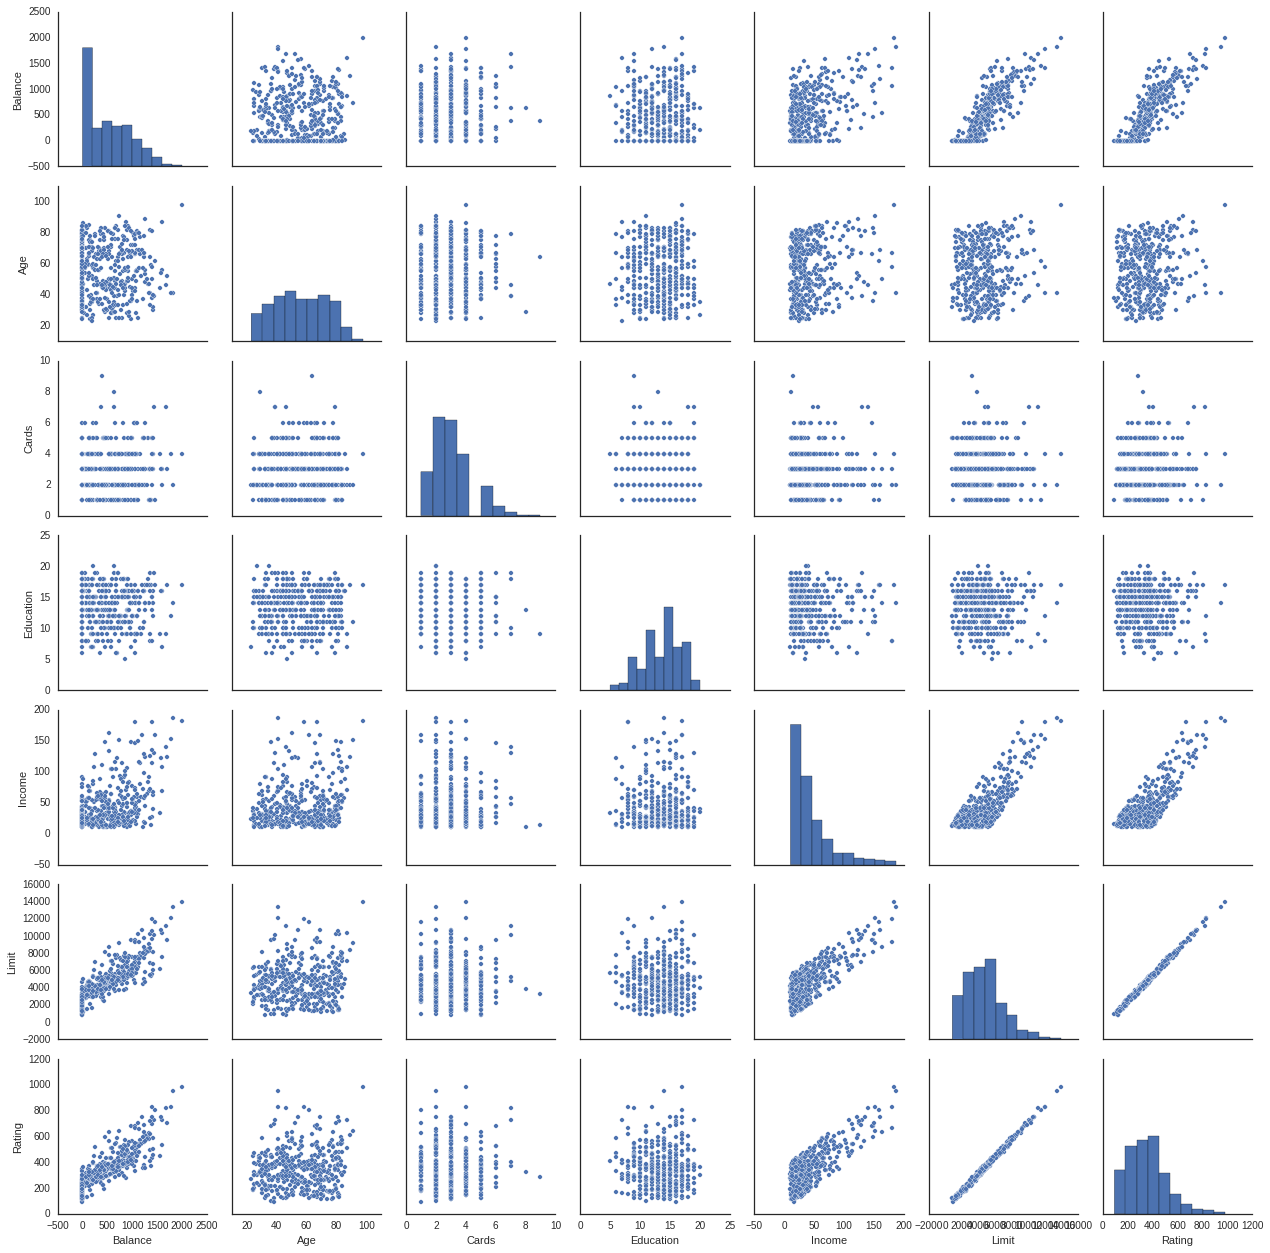

In [22]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

###  Table 3.7

In [23]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Table 3.8

In [24]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Table 3.9 - Interaction Variables

In [25]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Figure 3.7 - Interaction between qualitative and quantative variables

In [26]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


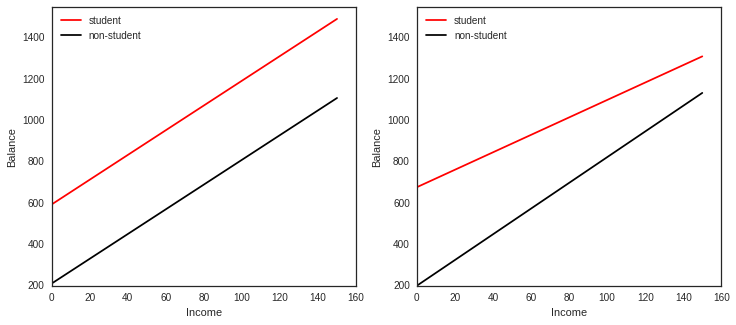

In [27]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

### Figure 3.8 - Non-linear relationships

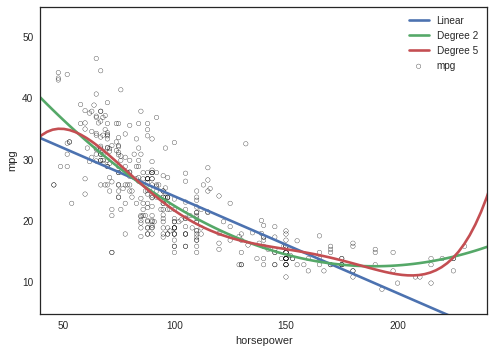

In [28]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k') 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

### Table 3.10

In [29]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

   mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0   18          8           307         130    3504          12.0    70   
1   15          8           350         165    3693          11.5    70   
2   18          8           318         150    3436          11.0    70   

   origin                       name  horsepower2  
0       1  chevrolet chevelle malibu        16900  
1       1          buick skylark 320        27225  
2       1         plymouth satellite        22500  

In [30]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Figure 3.9

In [31]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].as_matrix()
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

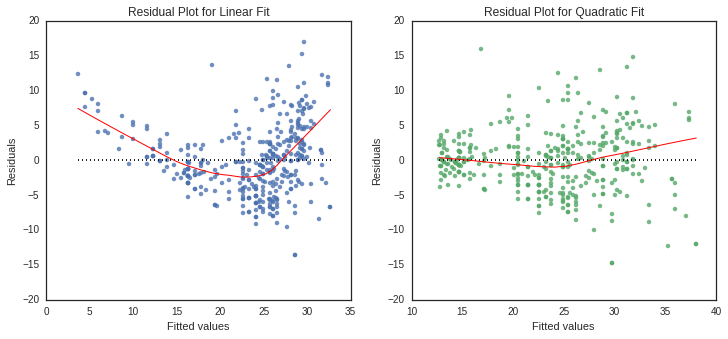

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True, ax=ax1, line_kws={'color':'r', 'lw':1})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True, line_kws={'color':'r', 'lw':1}, ax=ax2)
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0], xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')    

### Figure 3.14

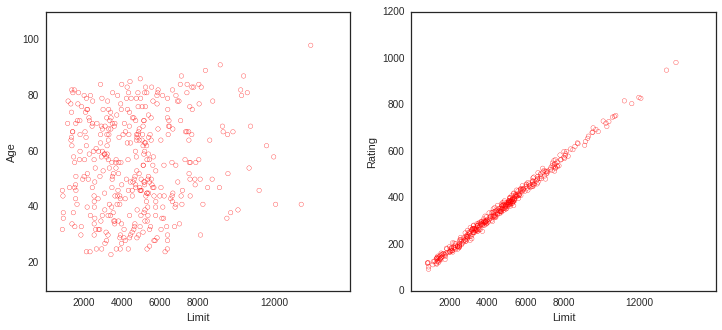

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

### Figure 3.15

In [34]:
y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']].as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit[['Rating', 'Limit']].as_matrix()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

('Age/Limit\n', 520.01499999999999)
[-2.29148553  0.17336497]
('\nRating/Limit\n', 520.0150000000001)
[ 2.20167217  0.02451438]


In [35]:
# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled + Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled+Y2[i,j]*Rating_scaled))**2).sum()/1000000

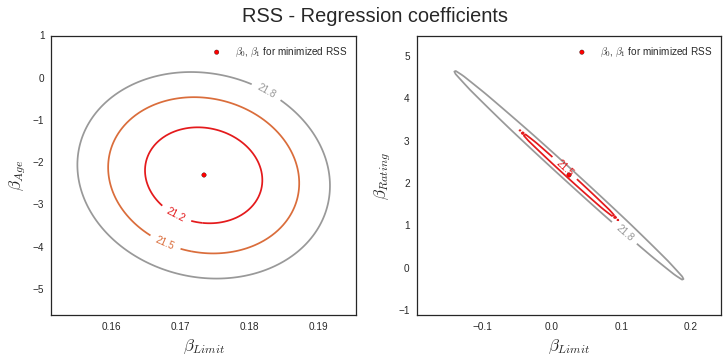

In [36]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

### Variance Inflation Factor (page 102)

In [37]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.01138468607
160.668300959
160.592879786


## Comparison of LR and KNN
<a name="LRKNN"></a>